<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.3 Linear Regression
_______________________________
###Topics:
* 1.3.1. QR decomposition
* 1.3.2. Least-squares problems
* 1.3.3. Linear regression

Linear regression is frequently used in practical applications due to its simplicity. The model depends linearly on its unknown parameters, making it easier to fit and analyze compared to models that are non-linearly related to their parameters. This section introduces QR decomposition, the least-squares problem, and its connection to linear regression.


## 1.3.1. QR Decomposition

QR decomposition is a useful method to solve the linear least-squares problem. It begins with the Gram-Schmidt algorithm, which generates an orthonormal basis $\text{span}(a_1, \ldots, a_m)$ from a linearly independent set of $\text{span}(a_1, \ldots, a_m)$.

Let:
$$
A =
\begin{pmatrix}
| & | & & | \\
a_1 & a_2 & \cdots & a_m \\
| & | & & |
\end{pmatrix}
\quad \text{and} \quad
Q =
\begin{pmatrix}
| & | & & | \\
q_1 & q_2 & \cdots & q_m \\
| & | & & |
\end{pmatrix}
$$
where $A$ and $Q$ are $n \times m$ matrices. The output of Gram-Schmidt is the QR decomposition:
$$
A = QR
$$
where $R$ is an upper triangular matrix containing the coefficients of the linear combination of $q_j$'s that produces $a_i$.


## 1.3.2 Least-squares problems

The least-squares method solves inconsistent linear systems, especially when there are more equations than unknowns. It finds an approximate solution by minimizing the difference between the observed and predicted values. The normal equations, $A^T A x = A^T b$, provide a way to solve this problem.

**Theorem (Normal Equations):**

Let $A \in \mathbb{R}^{n \times m}$ be an $n \times m$ matrix with linearly independent columns, and let $b \in \mathbb{R}^n$ be a vector. The solution to the least-squares problem
$$
\min_{x \in \mathbb{R}^m} \|Ax - b\|
$$
satisfies the normal equations:
$$
A^T A x = A^T b
$$


In [41]:
import numpy as np

# Over-determined system (3x2)
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([7, 8, 9])

# Normal equations: (A^T A) x = A^T b
AtA = A.T @ A
Atb = A.T @ b

# Solving the normal equations
x_normal = np.linalg.solve(AtA, Atb)

print("Solution using normal equations:", x_normal)


Solution using normal equations: [-6.   6.5]


**Theorem (Least Squares via QR Decomposition):**

Let $A \in \mathbb{R}^{n \times m}$ be an $n \times m$ matrix with linearly independent columns, let $b \in \mathbb{R}^n$ be a vector, and let $A = QR$ be a QR decomposition of $A$, where $Q$ is a $n \times m$ matrix with $Q^T Q = I_{m \times m}$ and $R$ is upper triangular. The solution to the least-squares problem
$$
\min_{x \in \mathbb{R}^m} \|Ax - b\|
$$
satisfies
$$
R x^* = Q^T b
$$


In [23]:
import numpy as np
from scipy.linalg import qr

A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([7, 8, 9])

# QR decomposition
Q, R = qr(A)

# Solve Rx = Q^T * b using least-squares solution
x_qr, residuals, rank, s = np.linalg.lstsq(R, Q.T @ b, rcond=None)

print("Solution using QR decomposition (least squares):", x_qr)


Solution using QR decomposition (least squares): [-6.   6.5]


## 1.3.3 Linear Regression

Given input data points $\{(x_i, y_i)\}_{i=1}^{n}$, where each $x_i = (x_{i1}, \dots, x_{id})^T$, we aim to fit an affine function to the data. The objective is to find coefficients $\beta_j$ that minimize the sum of squared residuals:
$$
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2,
$$
where the predicted values are given by:
$$
\hat{y}_i = \beta_0 + \sum_{j=1}^{d} \beta_j x_{ij}.
$$

This is a least-squares problem, and in matrix form, it can be expressed as:

$$
y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}, \quad
A =
\begin{pmatrix}
1 & x_{11} & \dots & x_{1d} \\
1 & x_{21} & \dots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \dots & x_{nd}
\end{pmatrix}, \quad
\beta =
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_d
\end{pmatrix}.
$$

The least-squares problem then becomes:
$$
\min_{\beta} \| y - A \beta \|^2.
$$

This is exactly the least-squares problem discussed in the previous section and can be solved using the normal equations or QR decomposition.

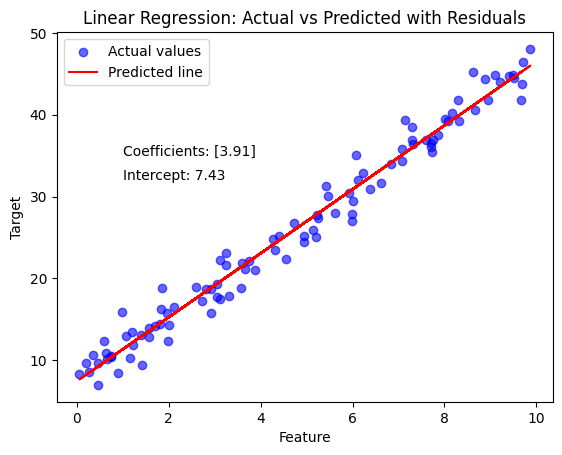

Coefficients (β): [3.90804535]
Intercept (β0): 7.4301923150935


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dataset with noise
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 4 * X[:, 0] + 7 + np.random.randn(100) * 2

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
beta = model.coef_
beta_0 = model.intercept_

# Predictions
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Actual values', alpha=0.6)
plt.plot(X, y_pred, color='red', linestyle='-', label='Predicted line')
plt.text(1, 35, f"Coefficients: {np.round(beta, 2)}", fontsize=10)
plt.text(1, 32, f"Intercept: {round(beta_0, 2)}", fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Actual vs Predicted with Residuals')
plt.legend()
plt.show()

print("Coefficients (β):", beta)
print("Intercept (β0):", beta_0)
